Survival on Titanic
Sheila de Montaigne

This is a Binary Classification problem because:
Because my target variable is categorical.

This is supervised learning because:
All of the data was pre-labelled 

Question I am posing:
Can I predict whether someone will survive and if so what would be the major attributes/features/characterics of a survivor. 

Target Variable: Survived




IMPORTS And VERSIONS

In [198]:
import sys
print("Python version: {}".format(sys.version))

import os #aides in getting current directory
#print("os version: {}".format(os.__version__))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

%matplotlib inline
import matplotlib.pyplot as plt #more powerful graphs
import matplotlib as mplt
print("matplotlib version: {}".format(mplt.__version__))

import seaborn as sbn #for pearson correlation coefficient
print("seaborn version: {}".format(sbn.__version__))

import scipy.stats as stats
#print("scipy version: {}".format(stats.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import re

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#Import models from scikit learn module:
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn import model_selection

from sklearn.preprocessing import LabelEncoder





Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.22.0
NumPy version: 1.14.0
matplotlib version: 2.1.2
seaborn version: 0.8.1
scikit-learn version: 0.19.1


LOAD DATA

In [199]:
os.getcwd()#Geting the current working directory
#data = pd.read_csv(r'/Users/sheilatupker/Desktop/titanicSurvival/train.csv')
train = pd.read_csv(r'train.csv')#r allows for special characters in filename - just in case
test = pd.read_csv(r'test.csv')

In [200]:
#NO LONGER MERGING DATASETS BC THE SPLIT CREATES PROBLEMS
#Merge Data Sets
#df = [train,test]
#data = pd.concat(df)

BEGINNING EXPLORATORY ANALYSIS

Implementation : Data Exploration
an investigation of the dataset below will determine how many people survived or not survived from each category and will also tell us the percentage of the people that are survived.

Total number of passengers in the input data - 891
no of passengers survived -- 342
no of passenger not survived - 549

Percentage of people survived - 38%
Female passengers survived most.
Most passengers in 1st class are survived

In [201]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:
train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [204]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [205]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [207]:
train.shape

(891, 12)

In [208]:
test.shape

(418, 11)

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [211]:
# notes to self to work on 
# box plots for the continious vars
# historgrams - for all vars
# value counts - for all discrete vars



             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


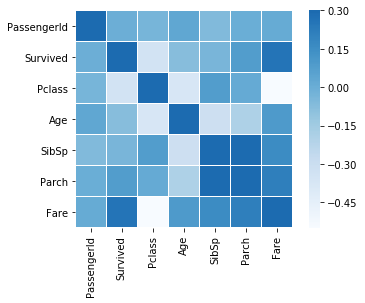

In [212]:
#Pearson Correlation Coefficient 

pCc = train.corr()
print(pCc)
sbn.heatmap(pCc,vmax = .3, center = 0, square = True, linewidth = .5, cmap="Blues")

Correlation Findings:

1) range is from -.45 to .30
This tells me there is not that strong of a correlation (it would need to be below -.50 and above .50)between variables

2) the strongest correlations are between:

pclass and fare (-.55)

fare and survived (+.26)

Parch and SibSip (+.41)


CLEANING UP DATA

In [213]:
#FIND AND DEAL WITH MISSING VALUES
train.isnull().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [214]:
test.isnull().any() 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [215]:
#When there are missing values I can throw them out or impute them. 
#Decision - don't even worry about "/cabin" and "/embarked" as there is no corrleation
# to "\survive". With this in mind I will remove these two variables altogether.
# Age is another case. While there is a low corrleation with "/survive" I am going to
# leave it and do more investigation. So how many "/ages" are missing?



In [216]:
train['Age'].isnull().sum()

177

In [217]:
train["Age"].isnull()


0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [218]:
#When there are missing values I can throw them out or impute them. 
#Decision - don't even worry about "/cabin" and "/embarked" as there is no corrleation
# to "\survive". With this in mind I will remove these two variables altogether.
# Age is another case. While there is a low corrleation with "/survive" I am going to
# leave it and do more investigation. So how many "/ages" are missing?



In [219]:
test['Age'].isnull().sum()

86

In [220]:
test["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408     True
409    False
410     True
411    False
412    False
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

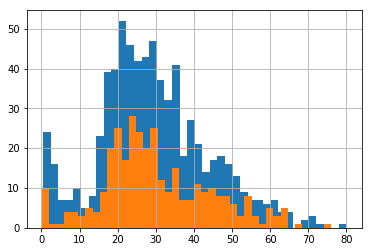

In [221]:
#Imputing Age
#don't want mode bc its continious so mean or median - do a distrubition/histogram to know which one to use
train['Age'].hist(bins=40)
test['Age'].hist(bins=40)


## Visulizing distributions of Age and Fare
#fig, axes = plt.subplots(1,2, figsize=(10,4))
#axes[0].hist(train['Age'], bins=40)
#axes[1].hist(train['Age'])

#data['Age'].hist(axes=axes[1], bins=15, density=True)
#data['Age'].plot(kind='density', color='green')

In [222]:
train['Age'].median()

28.0

In [223]:
test['Age'].median()

27.0

In [224]:
train['Age'].mean()

29.69911764705882

In [225]:
test['Age'].mean()

30.272590361445783

In [226]:
#difference is minimal so I can take either mean or median but since the dat is more
#right skewed I will take the median which is 28 in this case.
train['Age'].fillna(28, inplace=True) #replace with 28 and safe it to same file

In [227]:
#difference is minimal so I can take either mean or median but since the dat is more
#right skewed I will take the median which is 28 in this case.
test['Age'].fillna(27, inplace=True) #replace with 28 and safe it to same file

In [228]:
train['Age'].isnull().sum()

0

In [229]:
test['Age'].isnull().sum()

0

In [230]:
train['Fare'].isnull().sum()

0

In [231]:
test['Fare'].isnull().sum()

1

In [232]:
train['Survived'].isnull().sum()

0

In [233]:
test.isnull().any() 

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [234]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [235]:
#voila no more missing values

In [236]:
#Impact of PClass on Traning Data
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [237]:
#Impact of Sex attribute on Traning Data
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Come back and fill in the rest of the impact variables


In [238]:
#Now Drop Un-used variables
toDrop = ['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId']
train = train.drop(toDrop, axis =1) #instead of data = could do inplace = True



In [239]:
#Now Drop Un-used variables
toDrop = ['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId']
test= test.drop(toDrop, axis =1) #instead of data = could do inplace = True



In [240]:
test.dropna(axis=0,inplace=True,how='any')

In [241]:
test.isnull().any()

Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

In [242]:
test.shape

(417, 6)

In [243]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [244]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [245]:
#Voila!  No Null values For Both Data Sets 

In [246]:
#Impact of PClass on Traning Data
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [247]:
#next - all correct data type and encoded properly

In [248]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [249]:
test.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

Time to Encode the data

In [250]:
#Sex is categorical so change to numbers
catSex = ['Sex']
le = LabelEncoder()
for i in catSex:
    train[i] = le.fit_transform(train[i])
train.dtypes 

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [251]:
#Sex is categorical so change to numbers
catSex = ['Sex']
le = LabelEncoder()
for i in catSex:
    test[i] = le.fit_transform(test[i])
test.dtypes 

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [252]:
train.head() #sex is now zeros and ones

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [253]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [254]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [255]:
#Resample will be necessary because the target variable is out of balance
#549 and 342 should be more balanced

DECIDE ON TARGET VAR THEN SEPERATING TARGET AND PREDICTOR 

In [256]:
#******Originally work below********

In [257]:
# TARGET VARIABLE (Y VALUE) IS GOING TO BE the Survived VARIABLE

#NOW SEPERATE THE TARGET FROM THE PREDICTOR VARS APPROPRIATELY
#Indexing to separate my data set into x and y
#x is my predictor var(s) - everything except the target to start with
#y is my target var - the one var which is Survived
x = train.iloc[:, 1:].values #for rows and cols except for the last one which is the target variable
y = train.iloc[:, 0].values.ravel() #ravel puts it into the correct format

TRAIN TEST SPLIT

In [258]:
#NORMALLY, THIS IS WHERE THE TRAIN TEST SPLIT WOULD GO
#THIS DATA WAS SPLIT FROM THE BEGINNING SO THIS STEP WILL NOT BE INCLUDED HERE
#80/20 split random state will keep your test    
#this is part of sklearn pkg
#random_state gives you reproducable results
#stratify it mimics the distrubtion of the variable so you get accurate split and accurate amounts that really represent the data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=0, stratify=y)

In [259]:
#Re-Sampling Data
#to handle the imbalance in 
update_y = SMOTE(random_state=0, ratio = 1.0)
update_x_train, update_y_train = update_y.fit_sample(x_train, y_train)

/Users/sheilatupker/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [260]:
#now the data is more balanced
print (np.bincount(update_y_train))
#now everything is check to go into our models
#we do not need standardization for decision trees because it is robust to numerical instability
#and it doesn't use any distance calculation

[439 439]


In [261]:
#now they are balanced

Machine Learning Starts Here

In [262]:
#Created a function that runs any model
#it fits the model, predicts the model, and it tests the accuracy
#finally, do K-fold validation to check the bias

#x_train = the x we just seperated and named x_train
#x_test = is our test var test set - our feature variables for testing
#y_train = is the y we just seprated and named y_train
#we did not include y_test because the Survival var was not included in the
#test set of data

def classification_model(model, x_train, x_test, y_train, y_test):
    #This is the learning stage of the algorithm - it is called "Fitting the Model"
    #As parameters it takes in training predictors and outcome
    model.fit(x_train, y_train)
    
    #Make predictions on testing set:
    predictions = model.predict(x_test)
    
    #dot format so put whatever the accuracy is inside of the curly braces.
    #then apply 3 decimal places
    #then sub this in for %s and voila
    print('Train Accuracy: {0:.3%}'.format(metrics.accuracy_score(y_train, model.predict(x_train))))
    print('Test Accuracy: {0:.3%}'.format(metrics.accuracy_score(y_test, predictions)))
    
    #calculate precision, recall, and fscore
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='micro')
    print('Fscore: ', fscore)
    
    #Classification Report
    print(classification_report(y_test, predictions))
    
    #cross validation to check for over fitting
    #creating a variable, kf, for the constructor of the built in object KFOLD()
    kf = model_selection.KFold(n_splits=6, random_state = 0)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
    print("6-fold cross validation average accuracy: %2f (+/- %0.2f)"%(results.mean(), results.std()*2))
    

In [263]:
#starting with Logistic Regression 
#bc we have a binary target variable.
#Also, we have a decent number of our predictive vars are continious.

#initialize model
model = LogisticRegression()
classification_model(model, x_train, x_test, y_train, y_test)

Train Accuracy: 79.635%
Test Accuracy: 79.330%
Fscore:  0.7932960893854749
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       110
          1       0.78      0.65      0.71        69

avg / total       0.79      0.79      0.79       179

6-fold cross validation average accuracy: 0.797726 (+/- 0.06)


In [264]:
#Re-Sampled Logistic Regression
#This is using the re-sampled survival data
classification_model(model, update_x_train, x_test, update_y_train, y_test)

Train Accuracy: 79.499%
Test Accuracy: 75.419%
Fscore:  0.7541899441340782
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       110
          1       0.68      0.68      0.68        69

avg / total       0.75      0.75      0.75       179

6-fold cross validation average accuracy: 0.784697 (+/- 0.04)
